# press shift key +enter key to every single box or just click on run {top}

In [29]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# kindly fill all thing correctly  
## enter the coin pair i.e BTCUSDT ,BNBUSDT 
#### coin = "BTCUSDT"

## Enter the Quantity / amount / number of coin i.e : 10,1000.0.00001 
#### qty = 0.0001

## Enter your binance key 
#### api_key = copy your keys
#### S_key = copy your keys

### note: these are mine, you have to create your mine key
### step 1 : go to binacnce account 
### step 2 : click on user centre drop box
### step 3 : select API management
### step 4 : where you can create key 
### step 5 : copy api key and paste in Api_key
### step 6 : capy scerty key and paste in s_key
### for for imformation
### https://www.binance.com/en/support/faq/360002502072

In [31]:
# change coin pair
coin = "BTCUSDT"
# enter amount of coin 
qty = 0.0001

from binance import Client
import pandas as pd
#binance key


Api_key = "hnd3fBXfIDbjZSxC2yLTXn1pTIHhCTiIvUjrnEDMEKIhuuTC26sYBLFzPP7jh3aU"
S_key ="2BaL2Bqe9T1Zgm9p5ewNcptslSDRZFkleeXLFq9LOa7sYNIHw1Gr7fo8ocFTugSt"


#note: these are mine, you have to create your mine key
#step 1 : go to binacnce account 
#step 2 : click on user centre drop box
#step 3 : select API management
#step 4 : where you can create key 
#step 5 : copy api key and paste in Api_key
#step 6 : capy scerty key and paste in s_key
#for for imformation
#https://www.binance.com/en/support/faq/360002502072

In [32]:
# with help of keys 
#connected with My binance account
client=Client(Api_key,S_key)
# to check my account is connected or not
client.get_account()
#my accout is every thing is zero

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1629345198230,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '0.00000000', 'locked'

<AxesSubplot:xlabel='Time'>

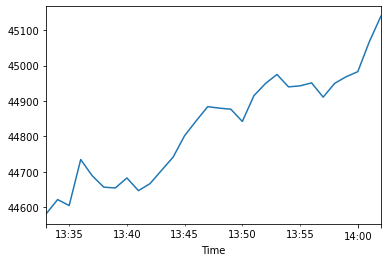

In [33]:
# display data in well form 
def getminutedata(symbol,interval,lockback):
    frame =pd.DataFrame(client.get_historical_klines(symbol,interval,lockback+" min ago UTC"))
    frame = frame.iloc[:,:6] #6 mean 6 columns
    frame.columns = ["Time","Open","High","Low","Close","Volume"]
    frame = frame.set_index("Time")
    frame.index = pd.to_datetime(frame.index,unit="ms")
    frame = frame.astype(float)
    return frame
#let test our method 
getminutedata(coin,"1m","30")
# GRAPH OF COIN LAST 30 MIN
g = getminutedata(coin,"1m","30")
g.Open.plot()

In [34]:
#buy if asset fell by more then 0.2% within the last 30 min 
#sell if asset rise by more than 0.15% or fall futher by 0.15%
def strategytest(symbol,qty,entried =False):
    df = getminutedata( symbol,"1m","30")
    cumulret = (df.Open.pct_change()+1).cumprod()-1
    if not entried:
        if cumulret[-1]<-0.002: #checking last enteri is below than 0.2%
            # in this case i will place order
            #Buy 
            order =client.create_order(symbol=symbol,side="BUY",type="MARKET",quantity=qty)
            print(order)
            entried =True
        else:
            print("No Trade has been executed")
    if entried:
        while True: # checking price  every mim -second  to sell
            df = getminutedata( symbol,"1m","30")
            sincebuy=df.loc[df.index>pd.to_datetime(order["transacrTime"],unit='ms')]
            if len(sincebuy) >0:
                sincebuyret =(sincebuy.Open.pct_change()+1).cumprod()-1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.0015:
                    #sell if asset rise by more than 0.15% or fall futher by 0.15%
                    # sell
                    order = client.create_order(symbol=symbol,side="SELL",type="MARKET",quantity=qty)
                    print(order)
                    break

In [36]:
t = 1
while(t!=0):{
    strategytest(coin,qty)
}



No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
N

No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
No Trade has been executed
N

ReadTimeout: HTTPSConnectionPool(host='api.binance.com', port=443): Read timed out. (read timeout=10)